In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
train_df_path ="/scratch/gobi2/projects/ml4h/datasets/CheXpert/split/July19/new_train.csv"
test_df_path ="/scratch/gobi2/projects/ml4h/datasets/CheXpert/split/July19/new_test.csv"
val_df_path = "/scratch/gobi2/projects/ml4h/datasets/CheXpert/split/July19/new_valid.csv"

val_df = pd.read_csv(val_df_path)
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)

In [3]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

178352
23022
22274


In [ ]:
WholeData = test_df.append([val_df, train_df])

In [ ]:
WholeData.head(5)

In [ ]:
WholeDataX =WholeData.groupby("Sex")
WholeDataX_df = WholeDataX.describe()
WholeDataX_df

In [ ]:
print("Number of images:",len(WholeData) )
Whole =WholeData.groupby("subject_id")
print("Number of unique patients:",len(Whole.count()) )

In [ ]:
dfWhole_Sex = WholeDataX_df["subject_id"]['count']
total_CXP= dfWhole_Sex["Female"]+dfWhole_Sex["Male"]
Male_percent = 100*dfWhole_Sex["Male"]/total_CXP
print("Male Percent:  ",Male_percent)

print("female Percent:  ",100*dfWhole_Sex["Female"]/total_CXP)
print("#images",total_CXP) 

In [ ]:
print("male",.8*59.2435184354535 + 0.1*(60.5638085309704  + 59.0778486127323))
print("0-20",.8*0.867946532699381 + 0.1*( 0.716705759708105 + 1.01912543773009))
print("40-60",.8*30.8726563200861 + 0.1*(32.3386326122839 + 30.6904911556074 ))

In [ ]:
WholeData['Sex'].value_counts()

In [ ]:
WholeData_020= WholeData[(WholeData['Age'] >= 0) & (WholeData['Age'] <= 19)]
WholeData_2040= WholeData[(WholeData['Age'] >= 20) & (WholeData['Age'] <= 39)]
WholeData_4060= WholeData[(WholeData['Age'] >= 40) & (WholeData['Age'] <= 59)]
WholeData_6080= WholeData[(WholeData['Age'] >= 60) & (WholeData['Age'] <= 79)]
WholeData_80= WholeData[(WholeData['Age'] >= 80) ]
totalAgeCXP=len(WholeData_020)+len(WholeData_2040)+len(WholeData_4060)+len(WholeData_6080)+len(WholeData_80)


In [ ]:
print("'0-20' Percent:  ",100*len(WholeData_020)/totalAgeCXP)
print("'20-40' Percent:  ",100*len(WholeData_2040)/totalAgeCXP)
print("'40-60' Percent:  ",100*len(WholeData_4060)/totalAgeCXP)
print("'60-80' Percent:  ",100*len(WholeData_6080)/totalAgeCXP)
print("'80-' Percent:  ",100*len(WholeData_80)/totalAgeCXP)
16.010874230934327+38.93752682787237+31.005419230218916+13.178745170982973+0.8674345399914151

In [ ]:
Eval5 = pd.read_csv("./results90/Eval5.csv")
Eval4= pd.read_csv("./results56/Eval4.csv")
Eval3 = pd.read_csv("./results60/Eval3.csv")
Eval2 = pd.read_csv("./results32/Eval2.csv")
Eval1 = pd.read_csv("./results40/Eval1.csv")

In [ ]:
Evalall = Eval1[['label','auc']]

Evalall["auc2"]=Eval2['auc']
Evalall["auc3"]=Eval3['auc']
Evalall["auc4"]=Eval4['auc']
Evalall["auc5"]=Eval5['auc']
Evalall

In [ ]:
Evalall.mean(axis=0)

In [ ]:
print("CXP Mean of 14 aucs mean over 5 run:     ",round(Evalall.mean(axis=0).mean(),3))
print("CXP Confidence interval of 14 aucs mean over 5 run:   ",round(1.96 * Evalall.mean(axis=0).std()/np.sqrt(5) ,3 ) )

In [ ]:
print("CXP Mean of auce per disease over 5 run:     ")
round(Evalall.mean(axis=1),3)

In [ ]:
print("CXP Confidence interval of auce per disease over 5 run:     ")
round(1.96 * Evalall.std(axis=1)/ np.sqrt(5),3)

## Subgroup-specific underdiagnosis rate

### Age

In [ ]:
FP5_age = pd.read_csv("./results90/FP5_age.csv")
FP4_age= pd.read_csv("./results56/FP4_age.csv")
FP3_age = pd.read_csv("./results60/FP3_age.csv")
FP2_age = pd.read_csv("./results32/FP2_age.csv")
FP1_age = pd.read_csv("./results40/FP1_age.csv")
FP_age = FP1_age.append([FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()

In [ ]:
print("FPR distribiution in ages")
print(round(F_age_df.loc['mean'],3))

In [ ]:
round(1.96 * F_age_df.loc['std'] / np.sqrt(5),3)

In [ ]:
print("CXP: Mean FPR distribiution over ages")
mean([F_age_df.loc['mean']["60-80"], F_age_df.loc['mean']["40-60"],
       F_age_df.loc['mean']["20-40"], F_age_df.loc['mean']["0-20"],
       F_age_df.loc['mean']["80-"]])

In [ ]:
FP5_age = pd.read_csv("./results90/FPR5_FNR_NF_age.csv")
FP4_age= pd.read_csv("./results56/FPR4_FNR_NF_age.csv")
FP3_age = pd.read_csv("./results60/FPR3_FNR_NF_age.csv")
FP2_age = pd.read_csv("./results32/FPR2_FNR_NF_age.csv")
FP1_age = pd.read_csv("./results40/FPR1_FNR_NF_age.csv")
FP_age = FP1_age.append([FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()

In [ ]:
Age = ['0-20','20-40','40-60','60-80','80-' ]
FPR_FNR_Age_df = pd.DataFrame(Age, columns=["Age"])

def FiveRunSubgroup(factors, df_in, df_out):
    FPR = []
    FNR = []
    Percent = []
    CI_FPR =[]
    CI_FNR =[]
    ConfI = 1.96 * df_in.loc['std'] / np.sqrt(5)
    
    for fact in factors:
        Percent.append(round(df_in.loc['mean']['#'+fact],3))
        FPR.append(round(df_in.loc['mean']['FPR_'+fact],3))
        FNR.append(round(df_in.loc['mean']['FNR_'+fact],3))
        CI_FPR.append(round(ConfI.loc['FPR_'+fact],3))
        CI_FNR.append(round(ConfI.loc['FNR_'+fact],3))     
        
    df_out['#'] = Percent    
    df_out['FPR']=FPR 
    df_out['CI_FPR']=CI_FPR  

    df_out['FNR']=FNR 
    df_out['CI_FNR']=CI_FNR

    return df_out

FPR_FNR_Age_df=FiveRunSubgroup(Age, F_age_df, FPR_FNR_Age_df)
FPR_FNR_Age_df.to_csv('./results/Subgroun_FNR_FPR_Age.csv')
FPR_FNR_Age_df

### Sex

In [ ]:
FP5_sex = pd.read_csv("./results90/FP5_sex.csv")
FP4_sex= pd.read_csv("./results56/FP4_sex.csv")
FP3_sex = pd.read_csv("./results60/FP3_sex.csv")
FP2_sex = pd.read_csv("./results32/FP2_sex.csv")
FP1_sex = pd.read_csv("./results40/FP1_sex.csv")
FP_sex = FP1_sex.append([FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()

In [ ]:
print("FPR distribiution in sexes")
print(round(F_sex_df.loc['mean'],3))

In [ ]:
print("FPR distribiution in sexes Confidence interval")
round(1.96 * F_sex_df.loc['std'] / np.sqrt(5),3)

In [ ]:
print("CXP: Mean FPR distribiution over sexes")
mean([F_sex_df.loc['mean']["F"], F_sex_df.loc['mean']["M"]])

In [ ]:
FP5_sex = pd.read_csv("./results90/FPR5_FNR_NF_sex.csv")
FP4_sex= pd.read_csv("./results56/FPR4_FNR_NF_sex.csv")
FP3_sex = pd.read_csv("./results60/FPR3_FNR_NF_sex.csv")
FP2_sex = pd.read_csv("./results32/FPR2_FNR_NF_sex.csv")
FP1_sex = pd.read_csv("./results40/FPR1_FNR_NF_sex.csv")
FP_sex = FP1_sex.append([FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()

In [ ]:
Sex = ['M','F' ]
FPR_FNR_sex_df = pd.DataFrame(Sex, columns=["sex"])

FPR_FNR_sex_df=FiveRunSubgroup(Sex, F_sex_df, FPR_FNR_sex_df)
FPR_FNR_sex_df.to_csv('./results/Subgroun_FNR_FPR_Sex.csv')
FPR_FNR_sex_df

# Intersectional identity

In [ ]:
FP5_agesex = pd.read_csv("./results90/FP5_AgeSex.csv")
FP4_agesex= pd.read_csv("./results56/FP4_AgeSex.csv")
FP3_agesex = pd.read_csv("./results60/FP3_AgeSex.csv")
FP2_agesex = pd.read_csv("./results32/FP2_AgeSex.csv")
FP1_agesex = pd.read_csv("./results40/FP1_AgeSex.csv")
FP_agesex = FP1_agesex.append([FP2_agesex, FP3_agesex,FP4_agesex, FP5_agesex])
FP_AgeSex =FP_agesex.groupby("SexAge")                                     

In [ ]:
FP_AgSx_df = FP_AgeSex.describe()

In [ ]:
print("Age-Sex over male")
round(FP_AgSx_df['M']['mean'],3)

In [ ]:
print("mean: ", round(FP_AgSx_df['M']['mean'],3).mean() )

In [ ]:
round(1.96 * FP_AgSx_df['M']["std"] / np.sqrt(5),3)

In [ ]:
round(FP_AgSx_df['F']['mean'],3)

In [ ]:
round(1.96 * FP_AgSx_df['F']["std"] / np.sqrt(5),3)

In [ ]:
print("mean: ", round(FP_AgSx_df['F']['mean'],3).mean() )

In [ ]:
factors = ['F', 'M']
age =['0-20', '20-40', '40-60', '60-80','80-']
AgeSex_df = pd.DataFrame(age, columns=["Age"])
Num_df =  pd.read_csv("./results40/Num_AgeSex.csv")


def FiveRun(factors,want_df,df,Num):
    for factor in factors:    
        dfM0 = round(df[factor]['mean'],3)
        dfM2 = round(1.96 * df[factor]["std"] / np.sqrt(5),3)
        want_df[factor] = pd.DataFrame(dfM0.values.tolist(),columns =[factor])
        want_df['CI_'+factor] = pd.DataFrame(dfM2.values.tolist(),columns =['CI_'+factor])
        
        Num['Num_'+factor] = Num[factor]
    
    Num = Num.drop(factors,axis=1)
    want_df = want_df.merge(Num,left_on="Age", right_on="Age")
    
    return want_df

want = FiveRun(factors,AgeSex_df,FP_AgSx_df,Num_df)
want.to_csv('./results/Inter_AgeSex.csv')
want

## New from NIH

In [2]:
def FiveRunSubgroup(factors, df_in, df_out):
    FPR = []
    FNR = []
    Num_NNF = []
    Num_PNF = []
    CI_FPR =[]
    CI_FNR =[]
    ConfI = 1.96 * df_in.loc['std'] / np.sqrt(5)
    
    for fact in factors:
        Num_NNF.append(round(df_in.loc['mean']['#NNF_'+fact],3))
        Num_PNF.append(round(df_in.loc['mean']['#PNF_'+fact],3))
        FPR.append(round(df_in.loc['mean']['FPR_'+fact],3))
        FNR.append(round(df_in.loc['mean']['FNR_'+fact],3))
        CI_FPR.append(round(ConfI.loc['FPR_'+fact],3))
        CI_FNR.append(round(ConfI.loc['FNR_'+fact],3))     
        
    df_out['#NNF'] = Num_NNF
    df_out['#PNF'] = Num_PNF
    
    df_out['FPR']=FPR 
    df_out['CI_FPR']=CI_FPR  

    df_out['FNR']=FNR 
    df_out['CI_FNR']=CI_FNR

    return df_out


In [3]:
FP5_sex = pd.read_csv("./results32/FPRFNR_NF_sex.csv")
FP4_sex= pd.read_csv("./results40/FPRFNR_NF_sex.csv")
FP3_sex = pd.read_csv("./results56/FPRFNR_NF_sex.csv")
FP2_sex = pd.read_csv("./results60/FPRFNR_NF_sex.csv")
FP1_sex = pd.read_csv("./results90/FPRFNR_NF_sex.csv")
FP_sex = FP1_sex.append([FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()

In [4]:
Sex = ['M','F' ]
FPR_FNR_sex_df = pd.DataFrame(Sex, columns=["sex"])
FPR_FNR_sex_df=FiveRunSubgroup(Sex, F_sex_df, FPR_FNR_sex_df)
FPR_FNR_sex_df

,sex,#NNF,#PNF,FPR,CI_FPR,FNR,CI_FNR
0,M,11842.0,1317.0,0.093,0.006,0.357,0.018
1,F,8149.0,966.0,0.101,0.006,0.301,0.014


In [4]:
1317+966+11842+8149

22274

In [5]:
FP5_age = pd.read_csv("./results32/FPRFNR_NF_age.csv")
FP4_age= pd.read_csv("./results40/FPRFNR_NF_age.csv")
FP3_age = pd.read_csv("./results56/FPRFNR_NF_age.csv")
FP2_age = pd.read_csv("./results60/FPRFNR_NF_age.csv")
FP1_age = pd.read_csv("./results90/FPRFNR_NF_age.csv")
FP_age = FP1_age.append([FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()

In [6]:
Age = ['0-20','20-40','40-60','60-80','80-' ]
FPR_FNR_Age_df = pd.DataFrame(Age, columns=["Age"])
FPR_FNR_Age_df=FiveRunSubgroup(Age, F_age_df, FPR_FNR_Age_df)
FPR_FNR_Age_df

,Age,#NNF,#PNF,FPR,CI_FPR,FNR,CI_FNR
0,0-20,185.0,42.0,0.164,0.019,0.281,0.038
1,20-40,2337.0,595.0,0.206,0.010,0.164,0.014
2,40-60,5950.0,886.0,0.134,0.007,0.267,0.016
3,60-80,7990.0,624.0,0.069,0.005,0.497,0.018
4,80-,3529.0,136.0,0.019,0.004,0.768,0.046


In [5]:
42+595+886+624+136+185+2337+5950+7990+3529


22274

In [11]:
def PlotSubgroup(Param,my_colors, NotEnough=False):
    
    fig, ax = plt.subplots(figsize=(3,2))
    fontsize = 10

    sex = ('Male', 'Female','','80-', '60-80', '40-60', '20-40','0-20')
    sex_pos = np.arange(len(sex))

    FPR =   (FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='M',Param].tolist()[0],
             FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='F',Param].tolist()[0],
             np.NaN,
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='80-',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='60-80',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='40-60',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='20-40',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='0-20',Param].tolist()[0])


    error = (FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='M','CI_'+Param].tolist()[0],
             FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='F','CI_'+Param].tolist()[0],
             np.NaN,    
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='80-','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='60-80','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='40-60','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='20-40','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='0-20','CI_'+Param].tolist()[0])

    print(FPR)

    color = ['pink','pink','white','green','green','green','green','green']

    ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


    labels =['Male', 'Female','','80-', '60-80', '40-60', '20-40','0-20']
    x_pos = np.arange(len(labels))
  #  y_labels = ['0.0','0.1', '0.2','0.3', '0.4','0.5', '0.6','0.7','0.8']
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
   # ax.set_yticklabels(y_labels,fontsize = fontsize)
    #ax.invert_yaxis()  # labels read top-to-bottom
   # ax.set_ylabel('FPR',fontsize = fontsize)
    #ax.set_title('FEMALE', fontsize = fontsize)
    ax.set_ylim(top=0.8)
    ax.yaxis.grid(True)
    
    if NotEnough:
    
    #my_colors = ['','grey', 'k','k', 'k','k']

        for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):

            ticklabel.set_color(tickcolor)

    plt.savefig('./FPRFNR/'+Param+'_NF.pdf',bbox_inches='tight')  
    

(0.093, 0.101, nan, 0.019, 0.069, 0.134, 0.206, 0.164)


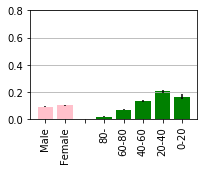

In [12]:
PlotSubgroup('FPR',my_colors=[])

(0.357, 0.301, nan, 0.768, 0.497, 0.267, 0.164, 0.281)


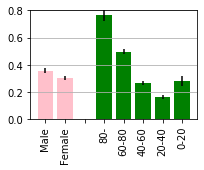

In [13]:

PlotSubgroup('FNR',my_colors=[])

## Intersectiopnal

In [14]:
FP5_agesex = pd.read_csv("./results32/FPFN_AgeSex.csv")
FP4_agesex= pd.read_csv("./results40/FPFN_AgeSex.csv")
FP3_agesex = pd.read_csv("./results56/FPFN_AgeSex.csv")
FP2_agesex = pd.read_csv("./results60/FPFN_AgeSex.csv")
FP1_agesex = pd.read_csv("./results90/FPFN_AgeSex.csv")
FP_agesex = FP1_agesex.append([FP2_agesex, FP3_agesex,FP4_agesex, FP5_agesex])
FP_AgeSex =FP_agesex.groupby("SexAge")
FP_AgSx_df = FP_AgeSex.describe()

In [15]:
factors = ['FPR_M','FNR_M','FPR_F','FNR_F']
age =['0-20', '20-40', '40-60', '60-80','80-']
AgeSex_df = pd.DataFrame(age, columns=["Age"])
Num_df =  pd.read_csv("./results40/Num_PNF_AgeSex.csv")


def FiveRun(factors,want_df,df,Num):
    for factor in factors:    
        dfM0 = round(df[factor]['mean'],3)
        dfM2 = round(1.96 * df[factor]["std"] / np.sqrt(5),3)
        want_df[factor] = pd.DataFrame(dfM0.values.tolist(),columns =[factor])
        want_df['CI_'+factor] = pd.DataFrame(dfM2.values.tolist(),columns =['CI_'+factor])
    
    return want_df

# Thid Num_F and Num_M is number of patient with actual NF = 0
want = FiveRun(factors,AgeSex_df,FP_AgSx_df,Num_df)
want.to_csv('./results/Inter_FPFN_AgeSex.csv')
want

,Age,FPR_M,CI_FPR_M,FNR_M,CI_FNR_M,FPR_F,CI_FPR_F,FNR_F,CI_FNR_F
0,0-20,0.202,0.023,0.293,0.034,0.117,0.021,0.257,0.056
1,20-40,0.188,0.010,0.188,0.017,0.236,0.011,0.129,0.012
2,40-60,0.126,0.008,0.297,0.022,0.146,0.006,0.231,0.013
3,60-80,0.068,0.005,0.525,0.022,0.070,0.005,0.453,0.022
4,80-,0.016,0.002,0.738,0.042,0.022,0.006,0.800,0.051


In [16]:
pd.read_csv("./results40/Num_PNF_AgeSex.csv") # use for FN

,Unnamed: 0,Age,M,F
0,0,40-60,490,396
1,1,60-80,377,247
2,2,20-40,351,244
3,3,80-,71,65
4,4,0-20,28,14


In [17]:
pd.read_csv("./results40/Num_NNF_AgeSex.csv")

,Unnamed: 0,Age,M,F
0,0,40-60,3550,2400
1,1,60-80,4864,3126
2,2,20-40,1476,861
3,3,80-,1849,1680
4,4,0-20,103,82


In [7]:
103+28+1476+351+3550+490+4864+377+1849+71+82+14+861+244+2400+396+3126+247+1680+65


22274

### Intersectional FN

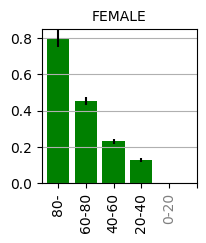

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2,2))
fontsize = 10

# sex
sex = ('80-', '60-80', '40-60', '20-40','0-20','')
sex_pos = np.arange(len(sex))
FNR =   (want.loc[want['Age']=='80-','FNR_F'].tolist()[0],
         want.loc[want['Age']=='60-80','FNR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','FNR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','FNR_F'].tolist()[0],
         np.NAN,np.NAN)

#print(FNR)
error = (#,np.NAN,
         want.loc[want['Age']=='80-','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='60-80','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','CI_FNR_F'].tolist()[0],
        np.NAN,np.NAN
        )

color = ['green','green','green','green','green','white']

ax.bar(sex_pos, FNR, yerr=error, align='center',color=color)


labels =['80-', '60-80', '40-60', '20-40','0-20','']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FNR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.85)
ax.yaxis.grid(True)

my_colors = ['k', 'k','k', 'k','grey']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('./FPRFNR/Int_FNR_NF.pdf',bbox_inches='tight')

### Intersectional FP

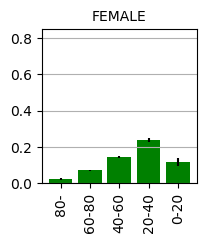

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2,2))
fontsize = 10

# sex
sex = ('80-', '60-80', '40-60', '20-40','0-20')
sex_pos = np.arange(len(sex))
FPR =   (want.loc[want['Age']=='80-','FPR_F'].tolist()[0],
         want.loc[want['Age']=='60-80','FPR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','FPR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','FPR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','FPR_F'].tolist()[0])


error = (want.loc[want['Age']=='80-','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='60-80','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','CI_FPR_F'].tolist()[0]
        )

color = ['green','green','green','green','green']

ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['80-', '60-80', '40-60', '20-40','0-20']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.85)
ax.yaxis.grid(True)

my_colors = ['k', 'k','k', 'k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('./FPRFNR/Int_FPR_NF.pdf',bbox_inches='tight')

